**In this Notebook we work on Titanic passengers database and make predictions on their survival in the mishap**

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


**Explore the data.**

In [380]:
dftrain.head()


,age,n_siblings_spouses,parch,fare,sex_female,sex_male,class_First,class_Second,class_Third,deck_A,...,deck_D,deck_E,deck_F,deck_unknown,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_unknown,alone_n,alone_y
0,22.0,1,0,7.2500,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
1,38.0,1,0,71.2833,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,26.0,0,0,7.9250,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,28.0,0,0,8.4583,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [2]:
dfeval.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


**Analyse the data**

In [3]:
dftrain.describe()


,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


**Look at labeled data of both training and evaluation set**

In [4]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [5]:
y_eval.head()

0    0
1    0
2    1
3    1
4    1
Name: survived, dtype: int64

**Distribution of age of passengers**

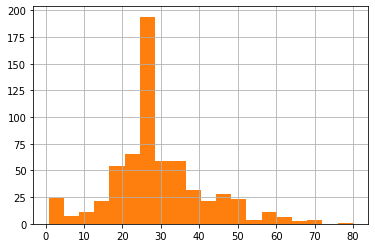

In [6]:
dftrain.age.hist(bins=20).set_xlabel=("age")
dftrain.age.hist(bins=20).set_ylabel=(' no.of passengers')
plt.show()


**Make some observations on the unfortundate :( data set**

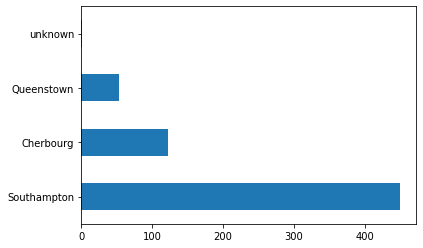

In [7]:
dftrain.embark_town.value_counts().plot(kind='barh')
plt.show()


**Survived Passengers for each class**

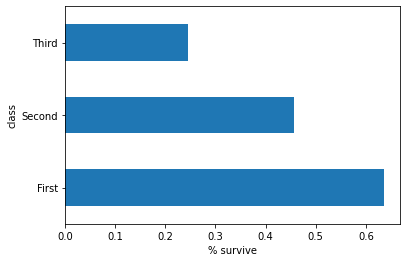

In [8]:
pd.concat([dftrain, y_train], axis=1).groupby('class').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()


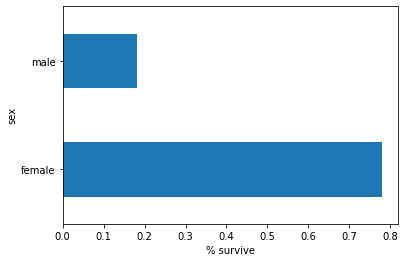

In [9]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()


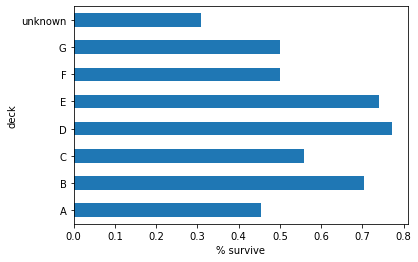

In [10]:
pd.concat([dftrain, y_train], axis=1).groupby('deck').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()


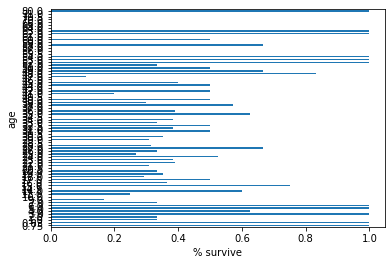

In [11]:
pd.concat([dftrain, y_train], axis=1).groupby('age').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()


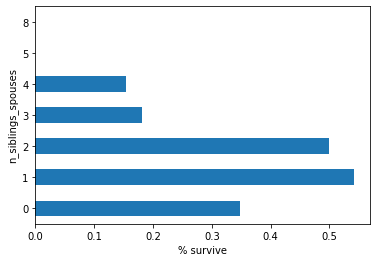

In [12]:
pd.concat([dftrain, y_train], axis=1).groupby('n_siblings_spouses').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()


**Changing Categorial features to numerical features**

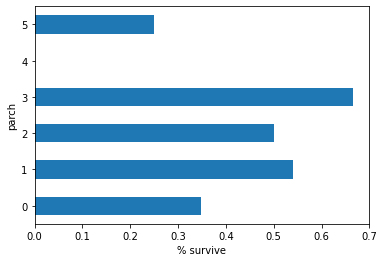

In [13]:
pd.concat([dftrain, y_train], axis=1).groupby('parch').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()


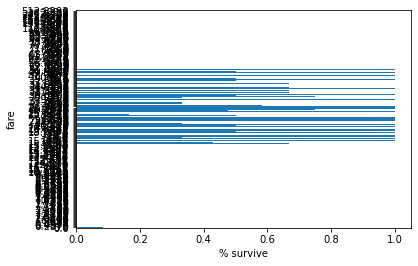

In [14]:
pd.concat([dftrain, y_train], axis=1).groupby('fare').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()


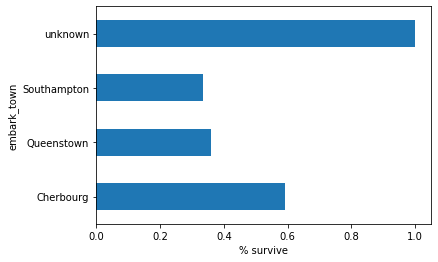

In [15]:
pd.concat([dftrain, y_train], axis=1).groupby('embark_town').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()


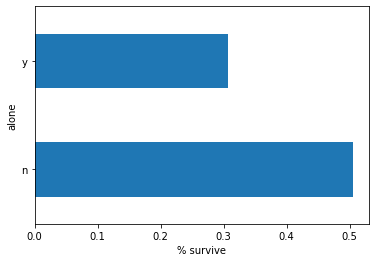

In [16]:
pd.concat([dftrain, y_train], axis=1).groupby('alone').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()


In [17]:
# Get dummies
dftrain = pd.get_dummies(dftrain, prefix_sep='_', drop_first=False)# X head
dfeval = pd.get_dummies(dfeval, prefix_sep='_', drop_first=False)
dftrain = dftrain.drop(columns="deck_G")

In [18]:
dftrain.shape

(627, 22)

In [19]:
dfeval.shape


(264, 22)

In [20]:
dfeval.head()

,age,n_siblings_spouses,parch,fare,sex_female,sex_male,class_First,class_Second,class_Third,deck_A,...,deck_D,deck_E,deck_F,deck_unknown,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_unknown,alone_n,alone_y
0,35.0,0,0,8.0500,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
1,54.0,0,0,51.8625,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,58.0,0,0,26.5500,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,55.0,0,0,16.0000,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,34.0,0,0,13.0000,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1


# **Decision Tree Classification**

Displaying the accuracy for various dept of tree


In [21]:
for i in range(1,10):
  dtc = DecisionTreeClassifier(max_depth=i)
  dtc.fit(dftrain, y_train)
  y_pred = dtc.predict(dfeval)
  print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))


Accuracy: 0.7424242424242424
Accuracy: 0.7424242424242424
Accuracy: 0.7954545454545454
Accuracy: 0.7992424242424242
Accuracy: 0.7689393939393939
Accuracy: 0.803030303030303
Accuracy: 0.8106060606060606
Accuracy: 0.803030303030303
Accuracy: 0.803030303030303


# **ADAPTIVE BOOSTING FOR DECISION TREE CLASSIFICATION**

Displaying the accuracy for various dept of tree

In [22]:
for i in range(1,10):
  abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i),n_estimators=50,
                         learning_rate=1)
  # Train Adaboost Classifer
  model = abc.fit(dftrain, y_train)

  #Predict the response for test dataset
  y_pred = model.predict(dfeval)

  print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.7765151515151515
Accuracy: 0.7840909090909091
Accuracy: 0.7386363636363636
Accuracy: 0.7424242424242424
Accuracy: 0.7651515151515151
Accuracy: 0.8068181818181818
Accuracy: 0.8181818181818182
Accuracy: 0.7840909090909091
Accuracy: 0.8106060606060606


**Linear SVM classifier**

In [23]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.7537878787878788


In [24]:

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=32, base_estimator=svc,learning_rate=.1)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))


Accuracy: 0.7651515151515151


**Poly SVM Classifier**

**Use SVM classifier with polynomial or radial basis function as kernel and later apply boosting and share your observations**

In [25]:
for i in range(1,4):
  svclassifier = SVC(kernel='poly',gamma='auto', degree = i ,shrinking=True,probability=False,tol=0.001)
  svclassifier.fit(dftrain, y_train)
  y_pred = svclassifier.predict(dfeval)
  print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.7424242424242424
Accuracy: 0.7916666666666666
Accuracy: 0.7992424242424242


In [26]:
for i in range(1,4):
  svclassifier = SVC(kernel='poly',gamma='auto', degree = i ,shrinking=True,probability=False,tol=0.001)
  # Create adaboost classifer object
  abc =AdaBoostClassifier(n_estimators=32, base_estimator=svc,learning_rate=.1)

  # Train Adaboost Classifer
  model = abc.fit(dftrain, y_train)

  #Predict the response for test dataset
  y_pred = model.predict(dfeval)
  print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))


Accuracy: 0.7689393939393939
Accuracy: 0.7651515151515151
Accuracy: 0.7613636363636364


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10),'kernel':['linear','rbf']}
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter

n_iter_search = 15
random_search = RandomizedSearchCV(
    SVC(), param_distributions, n_iter=n_iter_search
)
random_search.fit(dftrain,y_train)
random_search.best_params_
predic = random_search.predict(dfeval)
print(metrics.classification_report(y_eval, predic))
confusion_matrix = metrics.confusion_matrix(y_eval, predic)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       165
           1       0.67      0.68      0.67        99

    accuracy                           0.75       264
   macro avg       0.74      0.74      0.74       264
weighted avg       0.75      0.75      0.75       264

[[132  33]
 [ 32  67]]


It is clear from the results of hyperparameter tuning that the overall accuracy is 75% 

Thus decision tree classifier with adaptive boosting has the highest accuracy of all.

In [387]:

for j in range(50,100):
  abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),n_estimators=j,
                         learning_rate=0.01)
  # Train Adaboost Classifer
  model = abc.fit(dftrain, y_train)

  #Predict the response for test dataset
  y_pred = model.predict(dfeval)

  print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)) 


Accuracy: 0.8068181818181818
Accuracy: 0.8068181818181818
Accuracy: 0.8068181818181818
Accuracy: 0.803030303030303
Accuracy: 0.8106060606060606
Accuracy: 0.8068181818181818
Accuracy: 0.8068181818181818
Accuracy: 0.8068181818181818
Accuracy: 0.8068181818181818
Accuracy: 0.8106060606060606
Accuracy: 0.7992424242424242
Accuracy: 0.8068181818181818
Accuracy: 0.8068181818181818
Accuracy: 0.7916666666666666
Accuracy: 0.803030303030303
Accuracy: 0.8068181818181818
Accuracy: 0.7992424242424242
Accuracy: 0.803030303030303
Accuracy: 0.7916666666666666
Accuracy: 0.7916666666666666
Accuracy: 0.7878787878787878
Accuracy: 0.7878787878787878
Accuracy: 0.7954545454545454
Accuracy: 0.7878787878787878
Accuracy: 0.7916666666666666
Accuracy: 0.7916666666666666
Accuracy: 0.7916666666666666
Accuracy: 0.7916666666666666
Accuracy: 0.7954545454545454
Accuracy: 0.7954545454545454
Accuracy: 0.7954545454545454
Accuracy: 0.7992424242424242
Accuracy: 0.7954545454545454
Accuracy: 0.7954545454545454
Accuracy: 0.79166

In [388]:

for j in range(50,100):
  abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),n_estimators=j,
                         learning_rate=0.1)
  # Train Adaboost Classifer
  model = abc.fit(dftrain, y_train)

  #Predict the response for test dataset
  y_pred = model.predict(dfeval)

  print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)) 


Accuracy: 0.7878787878787878
Accuracy: 0.7727272727272727
Accuracy: 0.7916666666666666
Accuracy: 0.7803030303030303
Accuracy: 0.7916666666666666
Accuracy: 0.8068181818181818
Accuracy: 0.7916666666666666
Accuracy: 0.7840909090909091
Accuracy: 0.7765151515151515
Accuracy: 0.7992424242424242
Accuracy: 0.7992424242424242
Accuracy: 0.7840909090909091
Accuracy: 0.7840909090909091
Accuracy: 0.7878787878787878
Accuracy: 0.7803030303030303
Accuracy: 0.803030303030303
Accuracy: 0.803030303030303
Accuracy: 0.7878787878787878
Accuracy: 0.8068181818181818
Accuracy: 0.7992424242424242
Accuracy: 0.7916666666666666
Accuracy: 0.7878787878787878
Accuracy: 0.7954545454545454
Accuracy: 0.7954545454545454
Accuracy: 0.7803030303030303
Accuracy: 0.803030303030303
Accuracy: 0.7840909090909091
Accuracy: 0.7878787878787878
Accuracy: 0.7992424242424242
Accuracy: 0.7878787878787878
Accuracy: 0.7878787878787878
Accuracy: 0.7954545454545454
Accuracy: 0.7954545454545454
Accuracy: 0.7916666666666666
Accuracy: 0.78787

In [389]:

for j in range(50,100):
  abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),n_estimators=j,
                         learning_rate=1)
  # Train Adaboost Classifer
  model = abc.fit(dftrain, y_train)

  #Predict the response for test dataset
  y_pred = model.predict(dfeval)

  print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)) 


Accuracy: 0.821969696969697
Accuracy: 0.821969696969697
Accuracy: 0.8143939393939394
Accuracy: 0.8333333333333334
Accuracy: 0.8295454545454546
Accuracy: 0.8106060606060606
Accuracy: 0.8522727272727273
Accuracy: 0.8257575757575758
Accuracy: 0.8409090909090909
Accuracy: 0.8371212121212122
Accuracy: 0.8257575757575758
Accuracy: 0.8295454545454546
Accuracy: 0.821969696969697
Accuracy: 0.8257575757575758
Accuracy: 0.803030303030303
Accuracy: 0.8257575757575758
Accuracy: 0.8371212121212122
Accuracy: 0.8446969696969697
Accuracy: 0.8106060606060606
Accuracy: 0.8446969696969697
Accuracy: 0.8484848484848485
Accuracy: 0.8446969696969697
Accuracy: 0.8295454545454546
Accuracy: 0.8257575757575758
Accuracy: 0.8333333333333334
Accuracy: 0.8295454545454546
Accuracy: 0.8181818181818182
Accuracy: 0.821969696969697
Accuracy: 0.8143939393939394
Accuracy: 0.821969696969697
Accuracy: 0.8295454545454546
Accuracy: 0.8371212121212122
Accuracy: 0.8181818181818182
Accuracy: 0.8371212121212122
Accuracy: 0.84848484

In [273]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),n_estimators=100,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)

print("Accuracy:",metrics.accuracy_score(y_eval, y_pred))

Accuracy: 0.8522727272727273


I tried varying learning rate [0.01,0.1,100] with the n_estimator varying from 50 to 100, with a constant max_dept = 20.

It is clear from the results that the accuracy is the highest when the learning rate is 1
